In [4]:
import glob
import os
import json
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
import matplotlib.pyplot as plt
import collections

In [12]:
def plot_rounds(base_path, title, xlabel, ylabel):
    paths = glob.glob(base_path + '*')
    try:
        # Converting all to numbers and sort them
        properties = sorted(list(set([int(x.split('_')[-1]) for x in paths])))
    except:
        properties = sorted(list(set([x.split('_')[-1] for x in paths])))
    properties = filter(lambda x: len(x) <= len("dynamic"), properties)
    print("Properties: " + str(properties))
    
    eval_dict = {} # property -> epochs until finish
    for property_ in properties:
        epochs_to_finish = []
        mutation_paths = glob.glob(base_path + str(property_))
        for path in mutation_paths:
            if os.path.isfile(path + "/finish_history.json"):
                fitnesses = json.load(open(path + "/fitness_history.json"))
                epochs_to_finish.append(len(fitnesses))
        eval_dict[property_] = epochs_to_finish
    print("Dict: " + str(eval_dict))
    
    data = eval_dict.values()
    ordered_data = collections.OrderedDict(sorted(eval_dict.items()))
    plt.boxplot(list(ordered_data.values()))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(list(range(1, len(eval_dict.keys())+1)), ordered_data.keys())
    n = len(list(eval_dict.values())[0])
    plt.title(title.format(n))
    plt.show()

Properties: ['0.2', '0.3', '0.4', '0.5', '0.6', '0.7', 'dynamic']
Dict: {'0.7': [7, 1, 37], '0.3': [2, 14, 15], 'dynamic': [2, 1, 10], '0.4': [5, 1, 3], '0.2': [58, 5, 1], '0.6': [8, 23, 6], '0.5': [68, 1, 1]}


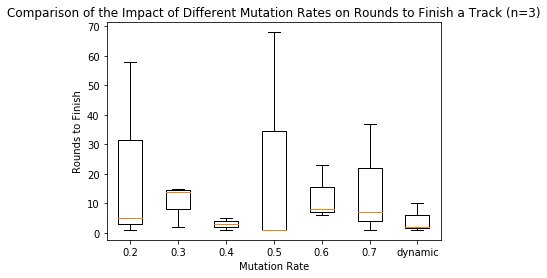

In [3]:
plot_rounds(base_path='26-Feb-2018_12:11:40rounds_100_num_networks_10evalround_*_test1_mutation_rate_',
            title="Comparison of the Impact of Different Mutation Rates on Rounds to Finish a Track (n={})",
            xlabel="Mutation Rate", ylabel="Rounds to Finish")

Properties: ['0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', 'dynamic']
Dict: {'0.1': [58, 13, 4, 1, 3, 8, 8, 6, 10], '0.9': [1, 1, 3, 1, 2, 6, 24, 2, 1, 4], '0.7': [2, 1, 15, 17, 1, 1, 2, 9, 7, 27], '0.3': [11, 7, 26, 58, 15, 3, 10, 5], 'dynamic': [6, 7, 101, 2, 3, 9, 1, 76, 1, 28], '0.4': [7, 4, 6, 53, 17, 5, 12, 7], '0.2': [13, 101, 10, 7, 17, 4, 29, 6], '0.6': [8, 42, 5, 4, 16, 2, 31, 11, 5, 6], '0.5': [22, 7, 27, 9, 44, 1, 7, 56], '0.8': [8, 1, 78, 18, 5, 10, 8, 17, 20, 5]}


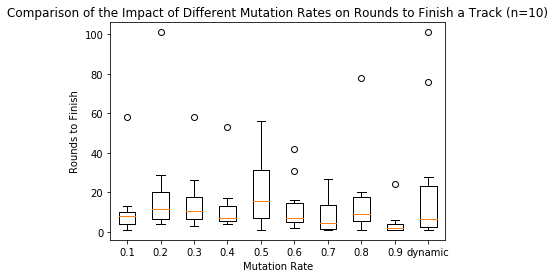

In [9]:
plot_rounds(base_path='26-Feb-2018_12:32:22rounds_100_num_networks_10evalround_*_test1_mutation_rate_',
            title="Comparison of the Impact of Different Mutation Rates on Rounds to Finish a Track (n=10)",
            xlabel="Mutation Rate", ylabel="Rounds to Finish")

Properties: [2, 3, 4, 5, 6, 7, 8, 9, 10]
Dict: {2: [101, 101, 101, 101, 101, 101, 101, 79, 101], 3: [101, 4, 101, 101, 87, 101, 101, 101, 8], 4: [11, 61, 6, 77, 1, 5, 1, 3], 5: [16, 5, 9, 63, 3, 8, 4, 1], 6: [2, 2, 7, 12, 68, 6, 4, 10, 19], 7: [10, 5, 13, 48, 1, 11, 4, 4, 52, 23], 8: [1, 6, 15, 11, 8, 12, 6, 4, 1, 14], 9: [1, 4, 8, 13, 53, 8, 101, 19, 1, 4], 10: [1, 7, 3, 2, 1, 30, 1, 19, 4]}


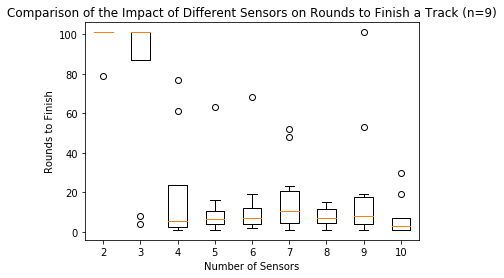

In [5]:
plot_rounds(base_path='26-Feb-2018_14:38:52rounds_100_num_networks_10evalround_*_test2_sensors_',
            title="Comparison of the Impact of Different Sensors on Rounds to Finish a Track (n={})",
            xlabel="Number of Sensors", ylabel="Rounds to Finish")

Properties: [2, 3, 4, 5, 6, 7, 8, 9, 10]
Dict: {2: [101, 101, 97, 18, 101, 101, 96, 101, 25, 101], 3: [101, 19, 101, 83, 101, 101, 101], 4: [18, 29, 3, 4, 3, 14, 5], 5: [19, 15, 11, 1, 13, 1, 4, 75], 6: [1, 66, 1, 4, 3, 11, 4, 1, 7], 7: [1, 5, 26, 4, 29, 1, 1, 12, 10], 8: [17, 11, 3, 7, 7, 1, 7, 7], 9: [16, 70, 11, 1, 1, 1, 5, 1], 10: [3, 34, 1, 48, 26, 1, 1, 12, 10]}


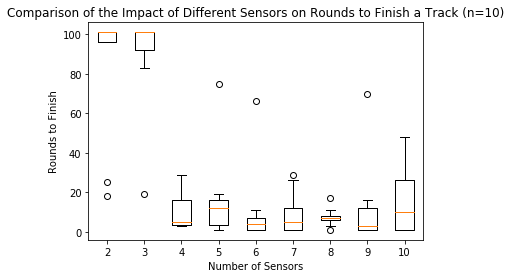

In [6]:
plot_rounds(base_path='26-Feb-2018_22:08:11rounds_100_num_networks_10evalround_*_test2_sensors_',
            title="Comparison of the Impact of Different Sensors on Rounds to Finish a Track (n={})",
            xlabel="Number of Sensors", ylabel="Rounds to Finish")

Properties: [2, 3, 4, 5, 6, 7, 8, 9, 10]
Dict: {2: [101, 101, 101, 101, 101, 97, 18, 101, 101, 101, 101, 101, 101, 79, 96, 101, 101, 25, 101], 3: [101, 4, 101, 101, 19, 101, 101, 83, 101, 87, 101, 101, 101, 101, 101, 8], 4: [18, 29, 3, 11, 4, 61, 6, 77, 1, 3, 5, 14, 1, 3, 5], 5: [19, 15, 11, 16, 1, 5, 13, 9, 1, 63, 4, 75, 3, 8, 4, 1], 6: [2, 1, 2, 7, 66, 12, 1, 68, 6, 4, 4, 10, 3, 19, 11, 4, 1, 7], 7: [1, 10, 5, 5, 26, 4, 13, 48, 1, 11, 29, 1, 1, 4, 4, 52, 12, 23, 10], 8: [1, 6, 17, 15, 11, 3, 7, 7, 1, 7, 11, 8, 12, 7, 6, 4, 1, 14], 9: [16, 70, 1, 11, 1, 4, 8, 13, 53, 8, 1, 1, 5, 101, 19, 1, 1, 4], 10: [1, 3, 34, 1, 7, 48, 26, 3, 2, 1, 30, 1, 1, 12, 10, 1, 19, 4]}


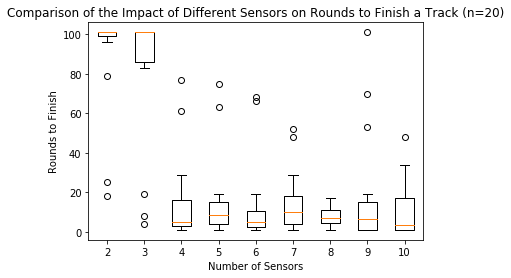

In [7]:
plot_rounds(base_path='26-Feb-2018_*rounds_100_num_networks_10evalround_*_test2_sensors_',
            title="Comparison of the Impact of Different Sensors on Rounds to Finish a Track (n=20)",
            xlabel="Number of Sensors", ylabel="Rounds to Finish")

Properties: [2, 3, 4, 5, 6, 7, 8, 9, 10]
Dict: {2: [101, 101, 101, 101, 101, 101, 101], 3: [101, 101, 101, 101], 4: [7, 5, 94, 101, 31], 5: [25, 101, 101, 101, 101], 6: [8, 37, 61, 27], 7: [16, 16, 14, 5, 35, 101], 8: [101, 5, 40, 92, 3, 14, 7], 9: [5, 15, 101, 14, 9, 101, 101], 10: [11, 10, 101, 29, 26, 2, 1]}


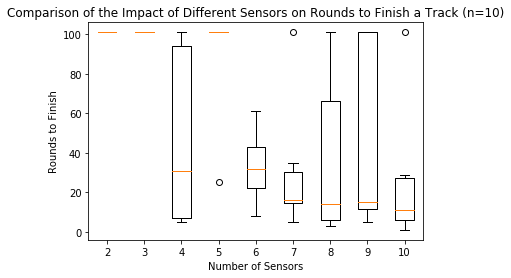

In [8]:
plot_rounds(base_path='02-Mar-2018_*rounds_100_num_networks_10evalround_*_test2_sensors_',
            title="Comparison of the Impact of Different Sensors on Rounds to Finish a Track (n=10)",
            xlabel="Number of Sensors", ylabel="Rounds to Finish")

Properties: <filter object at 0x7f39b3de00b8>
Dict: {'0.3': [1, 18, 5, 94, 1, 22, 5, 7, 54, 34, 13, 3, 15, 17, 19, 101, 101, 1, 12, 20, 1, 16, 4, 18, 22, 7], '0.2': [1, 31, 76, 4, 44, 14, 6, 5, 81, 8, 72, 3, 1, 101, 33, 101, 6, 101, 70, 23, 2, 16, 14, 39, 2], '0.1': [101, 2, 101, 67, 101, 11, 12, 20, 8, 14, 6, 53, 1, 1, 4, 11, 1, 53, 1, 1, 43, 101, 93, 101, 4, 6, 1, 2, 13, 1, 27, 5, 22, 1, 38, 8, 11, 18, 5, 11, 1, 41, 71, 39, 16, 101, 57, 11, 5, 1, 2, 6, 10, 10, 21, 23, 15, 32, 63, 11, 10, 2, 27, 72, 29, 10, 1, 98, 5, 19, 21, 2, 19, 61], '0.7': [13, 1, 4, 1, 3, 1, 1, 3, 22, 13, 4, 4, 66, 11, 1, 15, 51, 4, 6, 40, 10, 10, 6, 8, 101], 'dynamic': [1, 8, 18, 14, 15, 57, 26, 7, 22, 14, 7, 1, 1, 8, 2, 5, 14, 30, 17, 2, 25, 7, 11, 1, 17], '0.5': [51, 1, 3, 9, 51, 26, 59, 3, 25, 9, 25, 34, 1, 5, 20, 34, 35, 1, 1, 9, 72, 1, 1, 5], '0.6': [7, 1, 2, 1, 1, 4, 3, 101, 6, 9, 7, 1, 3, 2, 12, 1, 3, 1, 45, 74, 1, 22, 6, 2], '0.4': [55, 4, 41, 45, 1, 23, 24, 40, 101, 8, 101, 30, 6, 27, 11, 6, 4, 13, 15, 

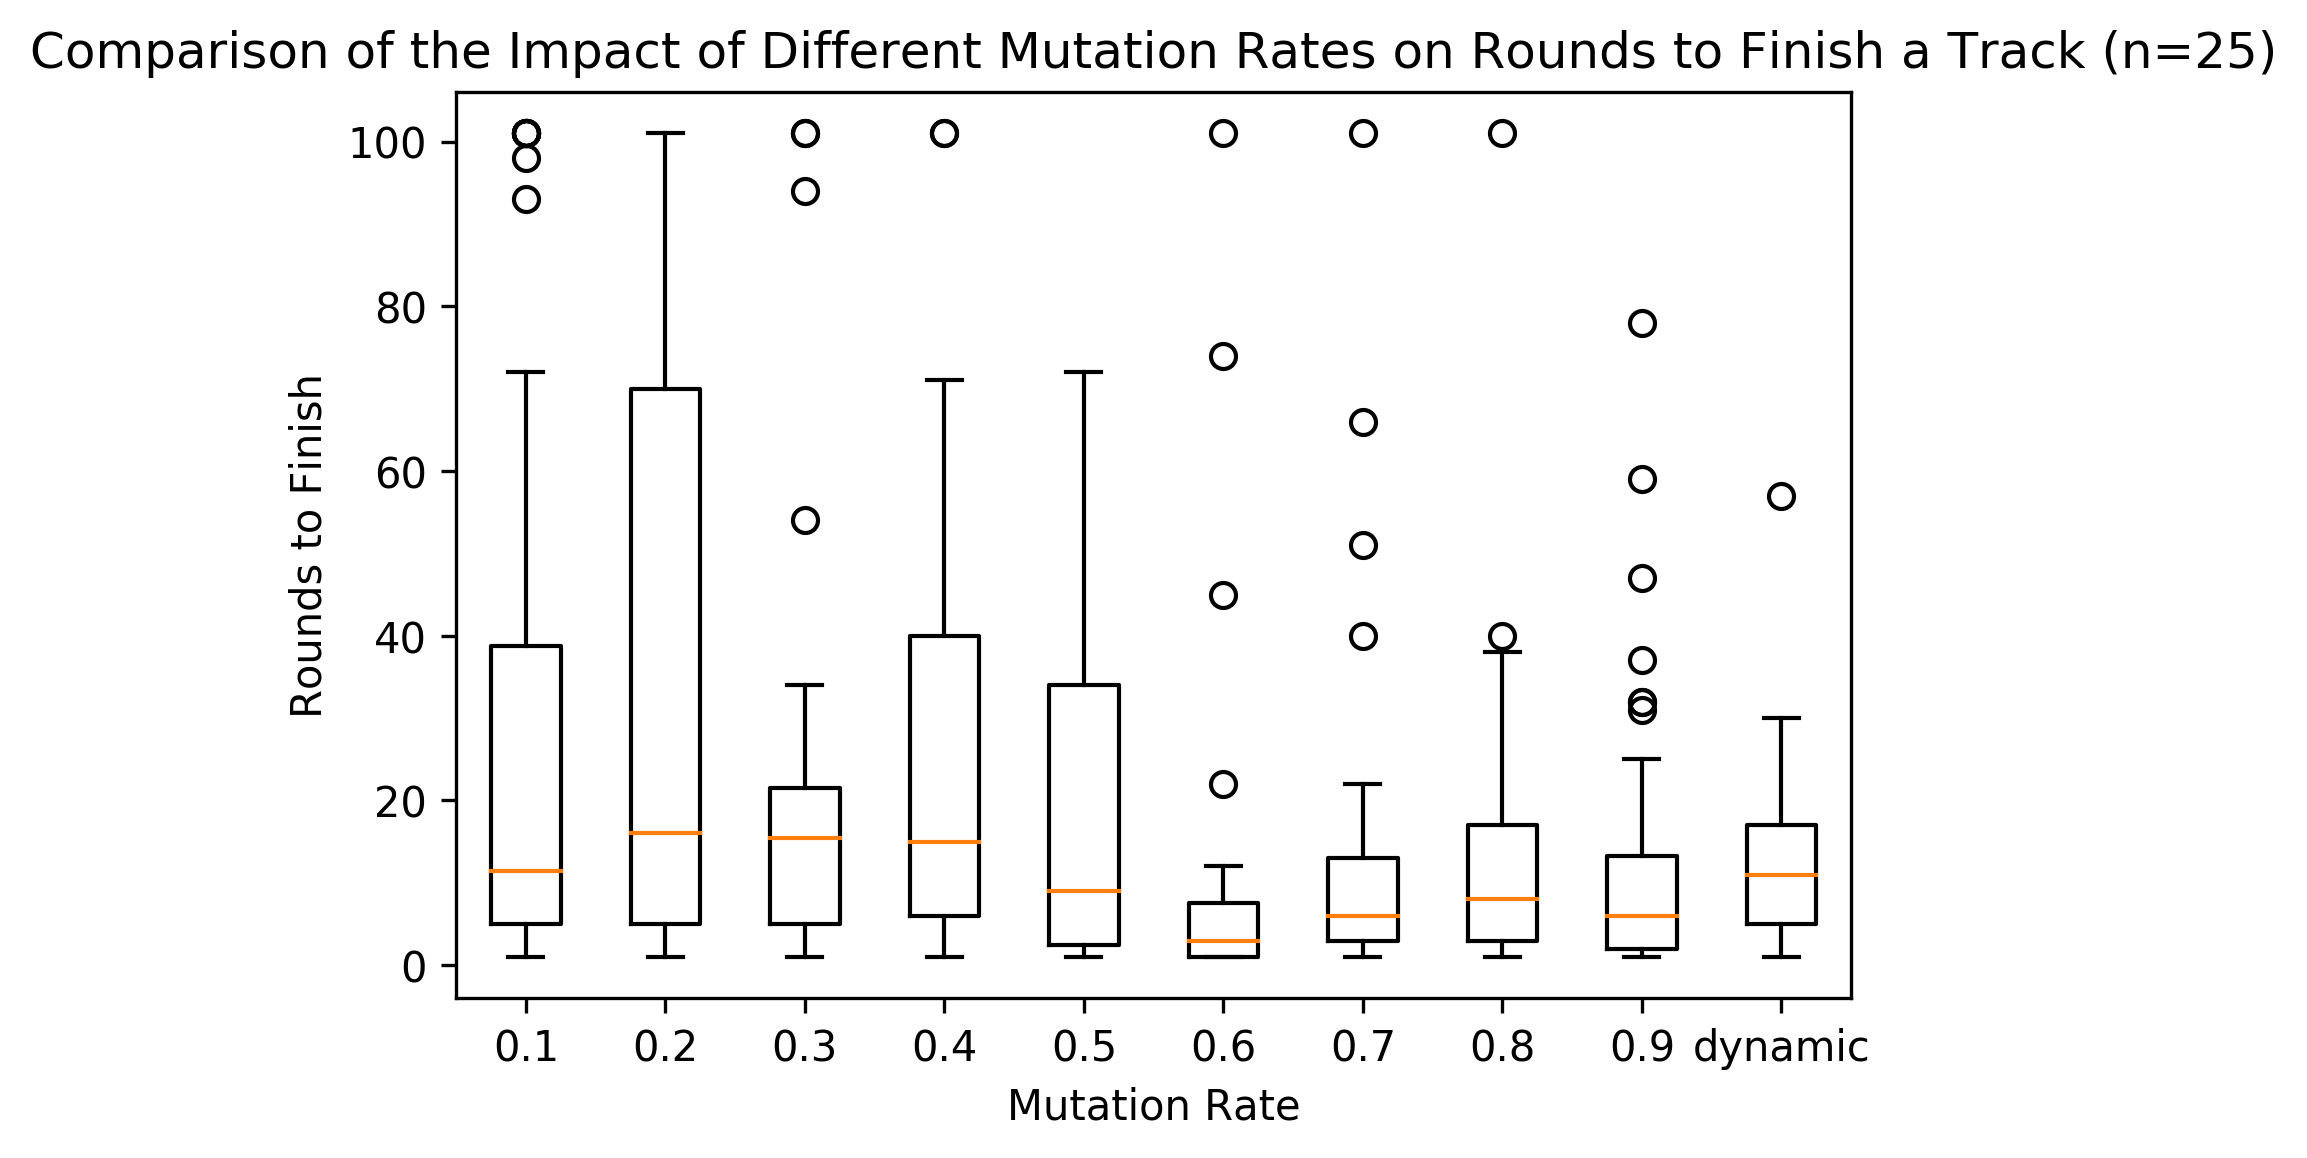

In [14]:
#Different Maps
plot_rounds(base_path='05-Mar-2018_*rounds_100_num_networks_10evalround_*_test5_seed_*_mutation_rate_',
            title="Comparison of the Impact of Different Mutation Rates on Rounds to Finish a Track (n=25)",
            xlabel="Mutation Rate", ylabel="Rounds to Finish")